In [14]:
import os

import random

import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [15]:
def load_images(folder_path, target_size=(128, 128)):

    images = []

    labels = []

    footwear_types = ['Boot', 'Sandal', 'Shoe']

    for footwear in footwear_types:

        footwear_folder = os.path.join(folder_path, footwear)

        if not os.path.exists(footwear_folder):

            print(f"Warning: Folder for {footwear} not found.")

            continue

        for img_name in os.listdir(footwear_folder):

            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):

                img_path = os.path.join(footwear_folder, img_name)

                img = Image.open(img_path).convert('L')  # Convert to grayscale

                img = img.resize(target_size)  # Resize to target size

                images.append(np.array(img).flatten())

                labels.append(footwear)

    return np.array(images), np.array(labels)

# Define the path to the Footwear folder

footwear_folder = '/kaggle/input/footwear/Footwear'

X, y = load_images(footwear_folder, target_size=(128, 128))

In [16]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

Q1

PCA and Number of components

In [17]:
pca = PCA(n_components=0.90)  # Preserve 90% of variance

X_pca = pca.fit_transform(X_scaled)

X_reconstructed = scaler.inverse_transform(pca.inverse_transform(X_pca))

n_components_90 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1

In [18]:
print(f"Total number of images processed: {X.shape[0]}")

print(f"Original dimension of each image: {X.shape[1]}")



# Print the number of images for each footwear type

unique, counts = np.unique(y, return_counts=True)

for footwear, count in zip(unique, counts):

    print(f"Number of {footwear} images: {count}")



print(f"\nNumber of components needed to preserve 90% of the variance: {n_components_90}")

print(f"Total number of components used (90% variance): {pca.n_components_}")

Total number of images processed: 3000
Original dimension of each image: 16384
Number of Boot images: 1000
Number of Sandal images: 1000
Number of Shoe images: 1000

Number of components needed to preserve 90% of the variance: 282
Total number of components used (90% variance): 282


Q2

10 images in original and their reconstruction keeping 90% variance using PCA

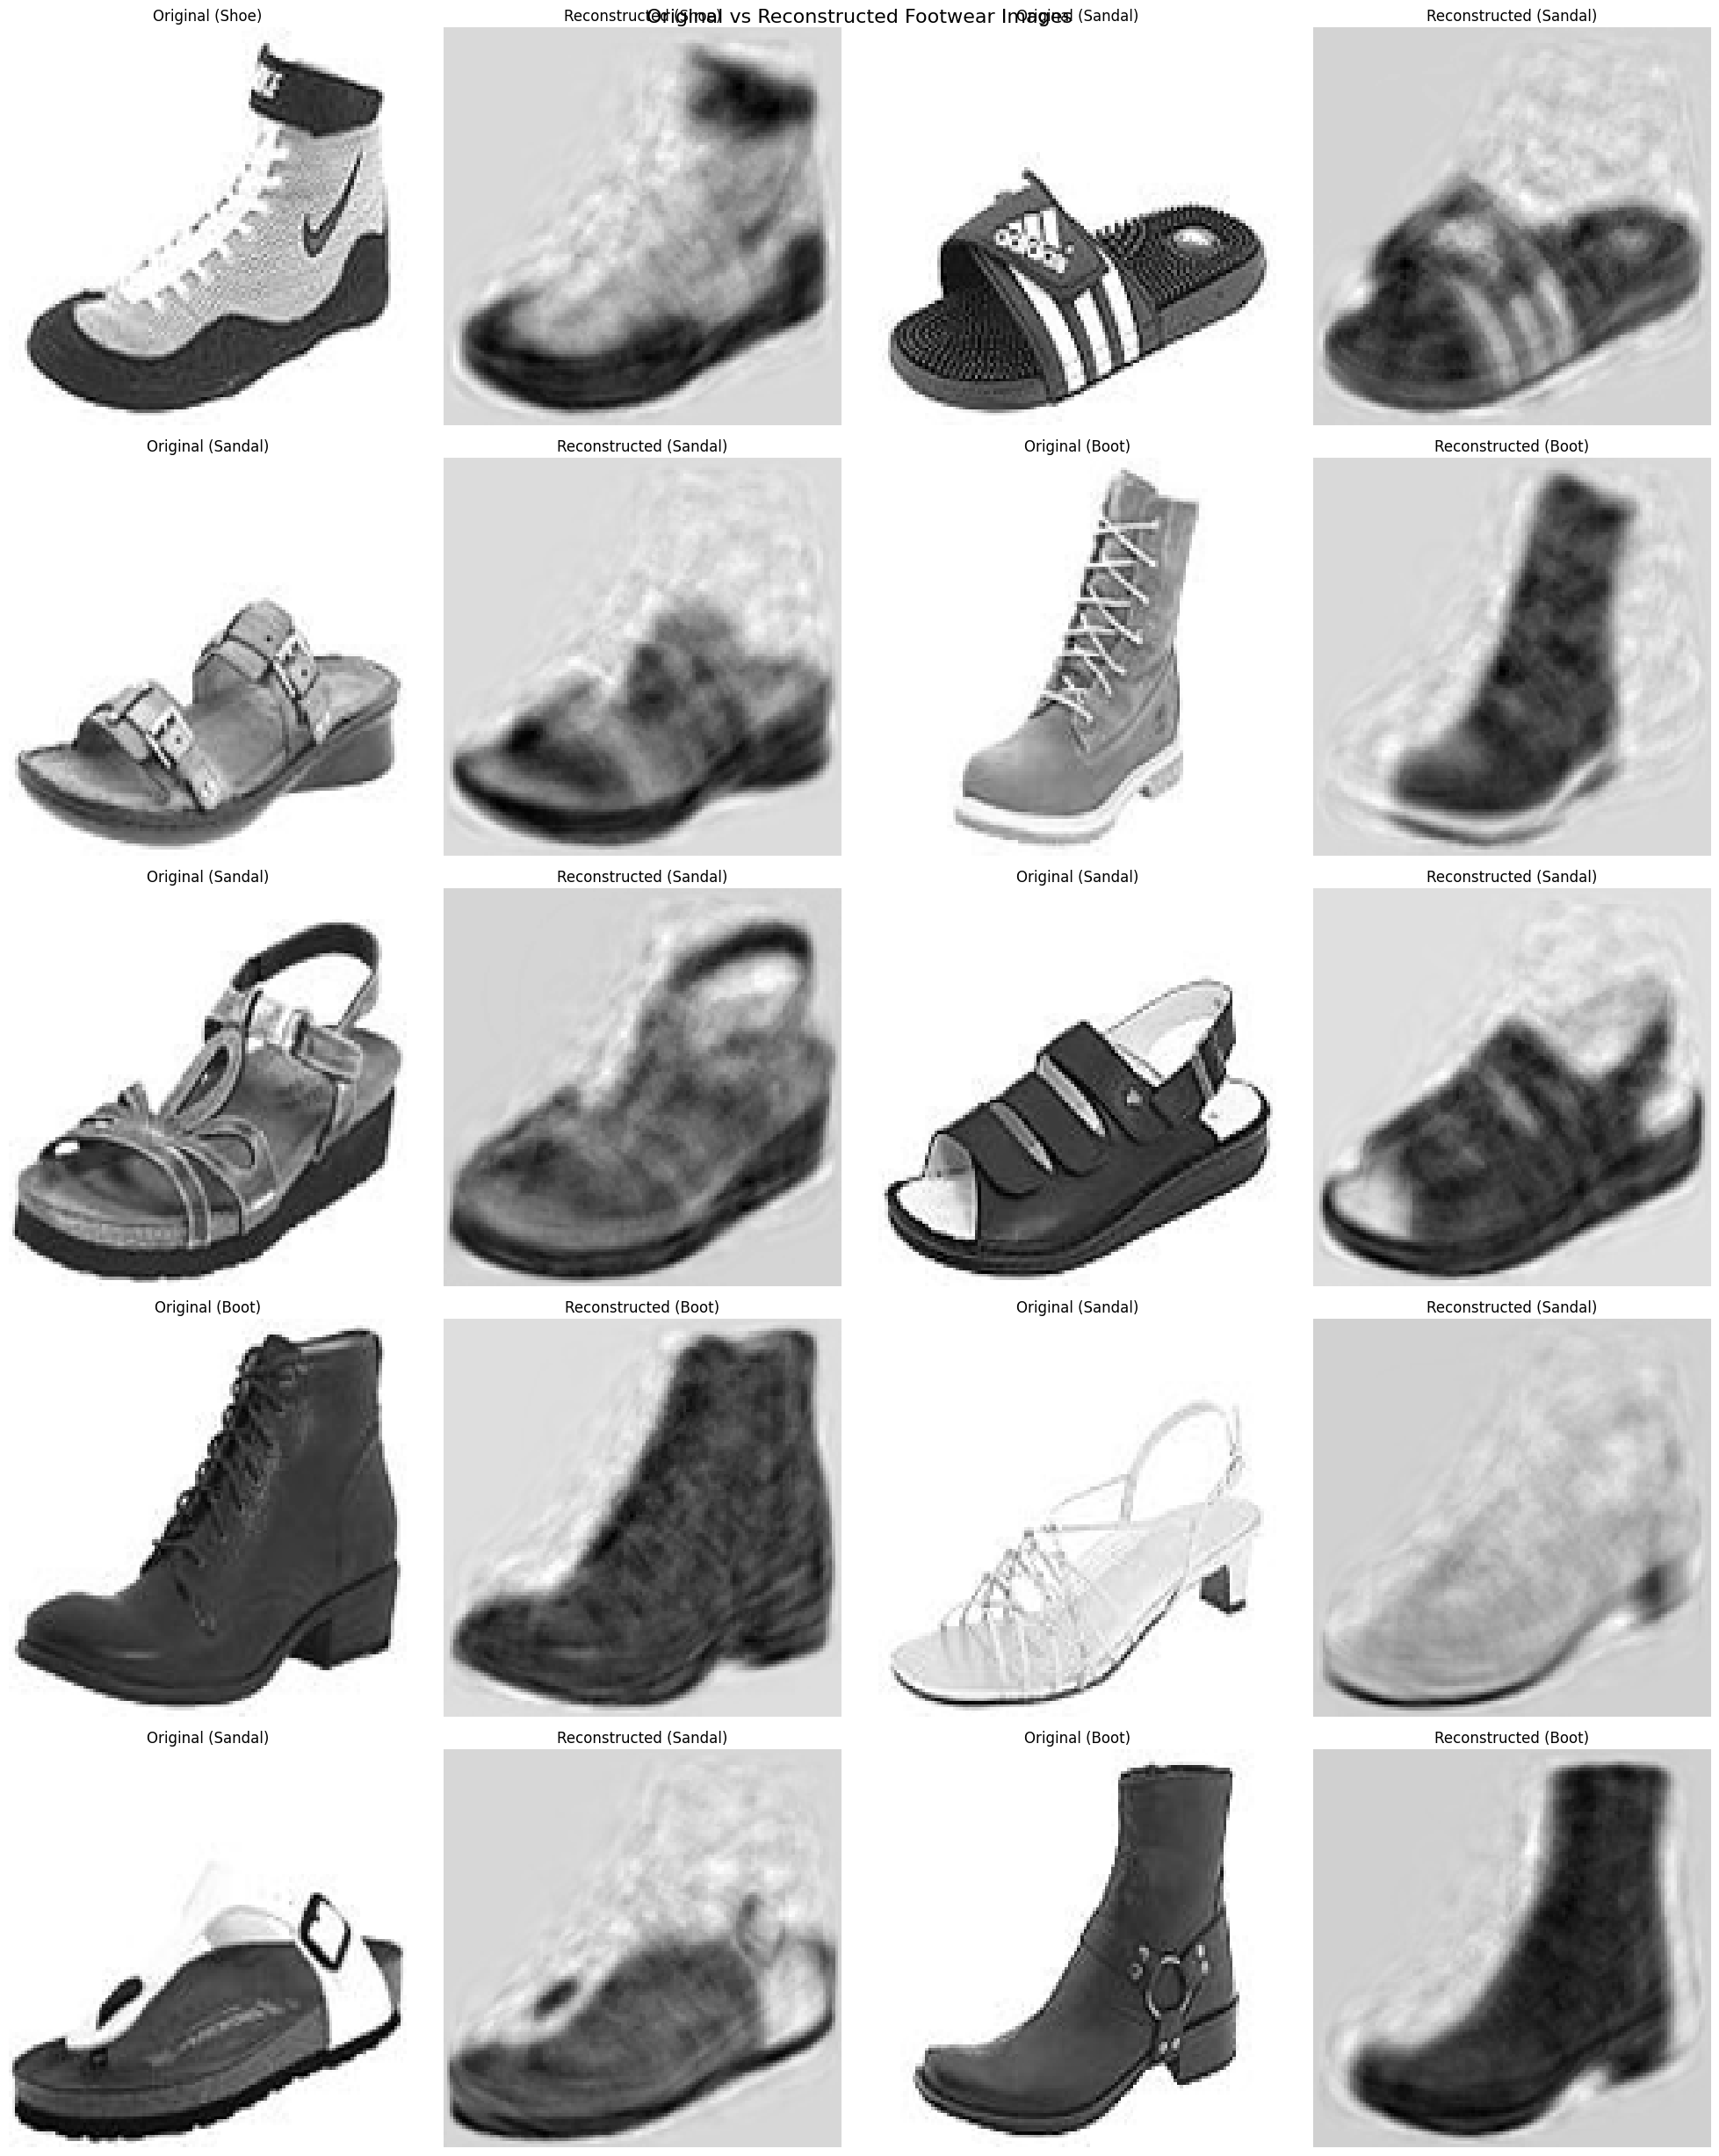

In [19]:
random_indices = random.sample(range(X.shape[0]), 10)



fig, axes = plt.subplots(5, 4, figsize=(20, 25))

fig.suptitle('Original vs Reconstructed Footwear Images', fontsize=16)



for i, idx in enumerate(random_indices):

    row = i // 2

    col = (i % 2) * 2



    axes[row, col].imshow(X[idx].reshape(128, 128), cmap='gray')

    axes[row, col].axis('off')

    axes[row, col].set_title(f'Original ({y[idx]})')



    axes[row, col+1].imshow(X_reconstructed[idx].reshape(128, 128), cmap='gray')

    axes[row, col+1].axis('off')

    axes[row, col+1].set_title(f'Reconstructed ({y[idx]})')



plt.tight_layout()

plt.show()

Q3 A

PCA with 2 dimensions



Amount of Variance preserved with these 2 components

In [20]:
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA



# Step 1: Standardize the data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



# Step 2: Apply PCA to reduce dimensions to 2

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)



# Step 3: Get the amount of variance explained by the first two principal components

explained_variance = pca.explained_variance_ratio_

total_variance_explained = np.sum(explained_variance)



print(f"Variance explained by the first two principal components: {total_variance_explained:.2f}")

print(f"Variance explained by each component: {explained_variance}")

Variance explained by the first two principal components: 0.27
Variance explained by each component: [0.17458847 0.09337674]


Q3 B

Scatter Plots of Components with some Images from your dataset



a) t-SNE



b) LLE



c) MDS

In [21]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

from sklearn.manifold import LocallyLinearEmbedding

from sklearn.manifold import MDS

from sklearn.preprocessing import StandardScaler

import os

from PIL import Image



def load_images(folder_path, target_size=(128, 128)):

    images = []

    labels = []

    footwear_types = ['Boot', 'Sandal', 'Shoe']

    for footwear in footwear_types:

        footwear_folder = os.path.join(folder_path, footwear)

        if not os.path.exists(footwear_folder):

            print(f"Warning: Folder for {footwear} not found.")

            continue

        for img_name in os.listdir(footwear_folder):

            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):

                img_path = os.path.join(footwear_folder, img_name)

                img = Image.open(img_path).convert('L')  # Convert to grayscale

                img = img.resize(target_size)  # Resize to target size

                images.append(np.array(img).flatten())

                labels.append(footwear)

    return np.array(images), np.array(labels)



# Load real images

folder_path = '/kaggle/input/footwear/Footwear'

X, y = load_images(folder_path)



# Standardize the data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


PCA

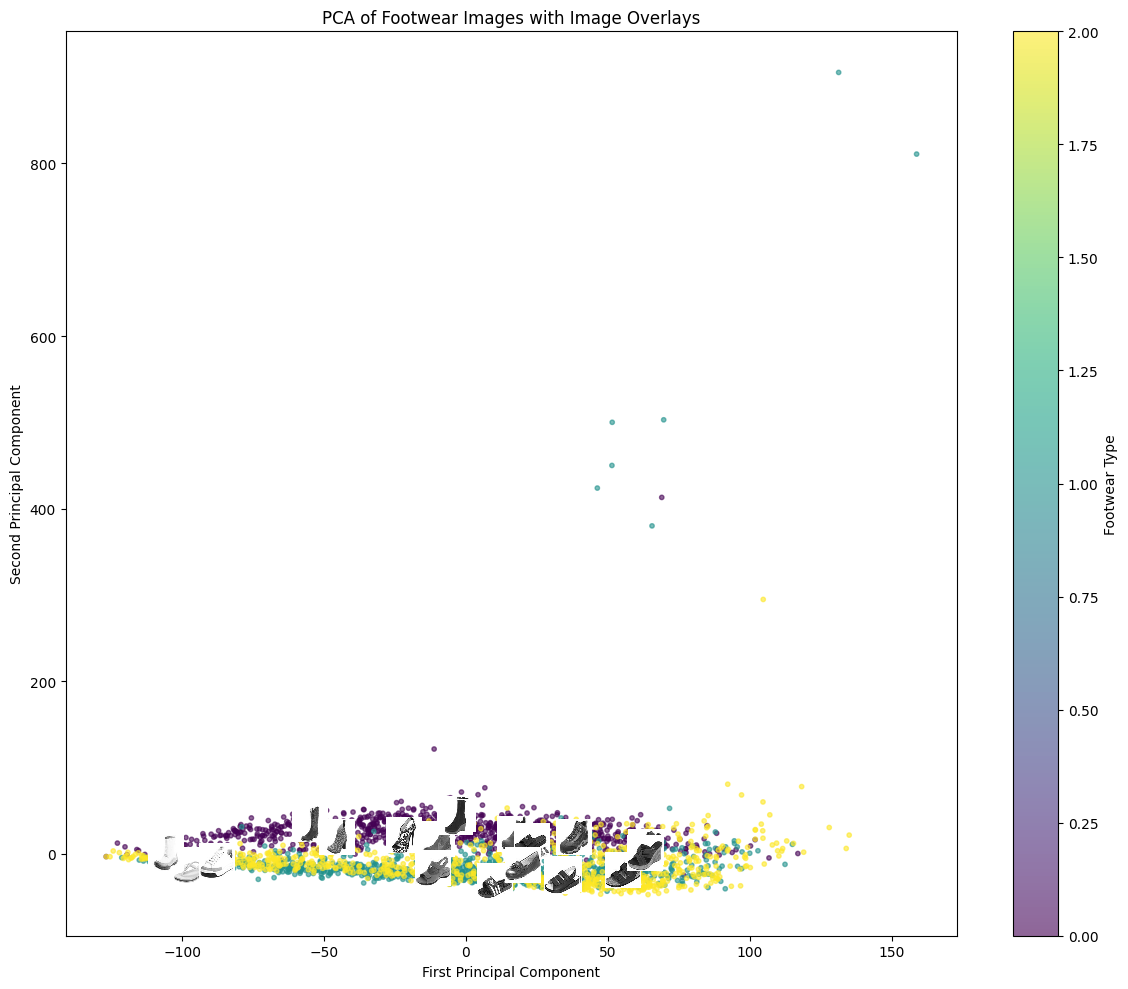

Variance explained by the first two principal components: 0.27


In [22]:
# Apply PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)



# Create a numeric encoding for the categories

category_encoding = {category: i for i, category in enumerate(np.unique(y))}

numeric_categories = np.array([category_encoding[cat] for cat in y])



# Create scatter plot

plt.figure(figsize=(12, 10), dpi=100)

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=numeric_categories, cmap='viridis', alpha=0.6, s=10)

plt.colorbar(scatter, label='Footwear Type')

plt.title('PCA of Footwear Images with Image Overlays')

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')



# Add image overlays

def plot_images(X, X_pca, images, ax, img_size=128, max_images=20):

    indices = np.random.choice(len(X), min(max_images, len(X)), replace=False)

    for index in indices:

        x, y = X_pca[index]

        img = X[index].reshape(img_size, img_size)

        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]

        imagebox = OffsetImage(img, zoom=0.2, cmap='gray')

        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0.0)

        ax.add_artist(ab)



plot_images(X, X_pca, y, plt.gca(), img_size=128, max_images=20)

plt.tight_layout()

plt.show()



# Print explained variance

variance_explained = pca.explained_variance_ratio_.sum()

print(f'Variance explained by the first two principal components: {variance_explained:.2f}')

t-SNE

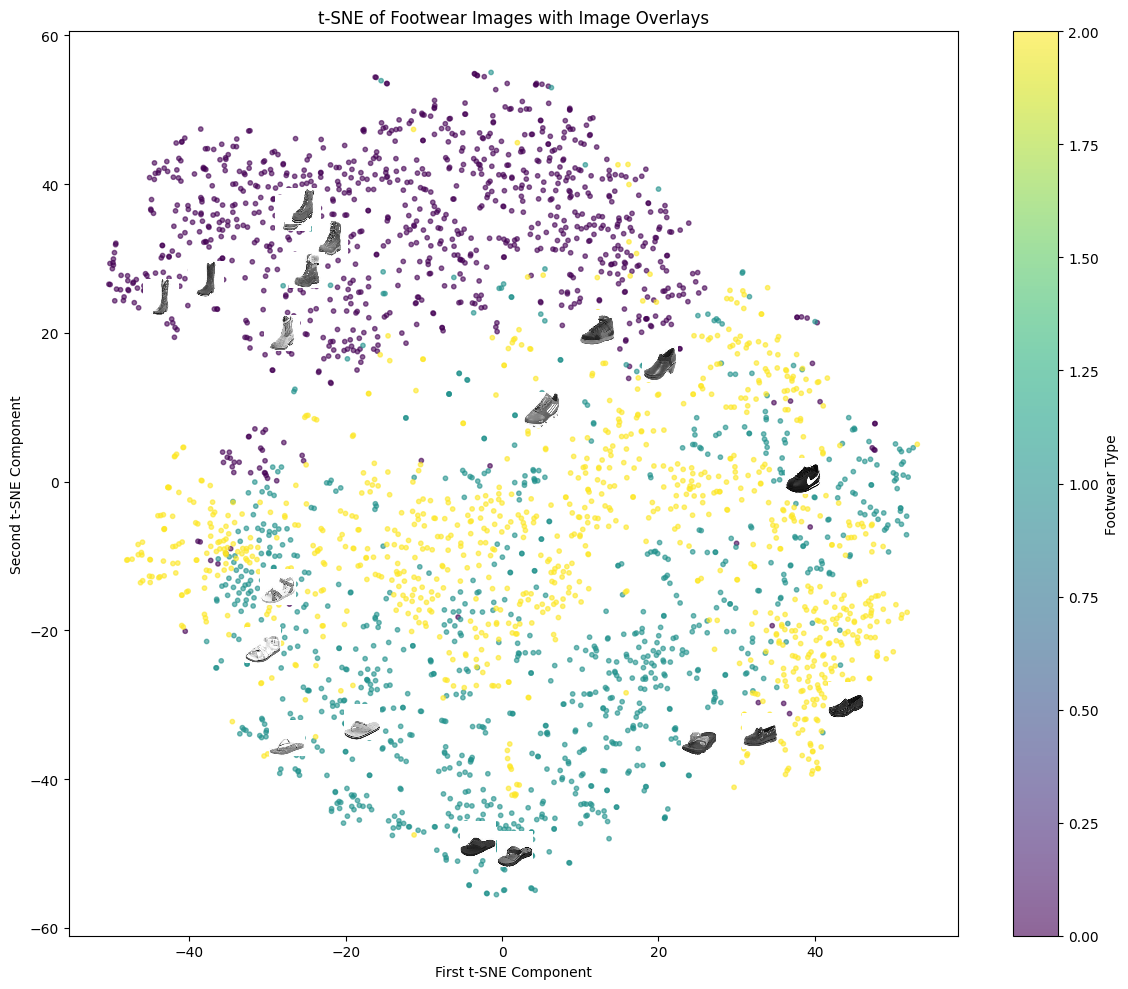

In [23]:
# Apply t-SNE

tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(X_scaled)



# Create a numeric encoding for the categories

category_encoding = {category: i for i, category in enumerate(np.unique(y))}

numeric_categories = np.array([category_encoding[cat] for cat in y])



# Create scatter plot

plt.figure(figsize=(12, 10), dpi=100)

scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=numeric_categories, cmap='viridis', alpha=0.6, s=10)

plt.colorbar(scatter, label='Footwear Type')

plt.title('t-SNE of Footwear Images with Image Overlays')

plt.xlabel('First t-SNE Component')

plt.ylabel('Second t-SNE Component')



# Add image overlays

def plot_images(X, X_tsne, images, ax, img_size=128, max_images=20):

    indices = np.random.choice(len(X), min(max_images, len(X)), replace=False)

    for index in indices:

        x, y = X_tsne[index]

        img = X[index].reshape(img_size, img_size)

        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]

        imagebox = OffsetImage(img, zoom=0.2, cmap='gray')

        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0.0)

        ax.add_artist(ab)



plot_images(X, X_tsne, y, plt.gca(), img_size=128, max_images=20)

plt.tight_layout()

plt.show()

LLE

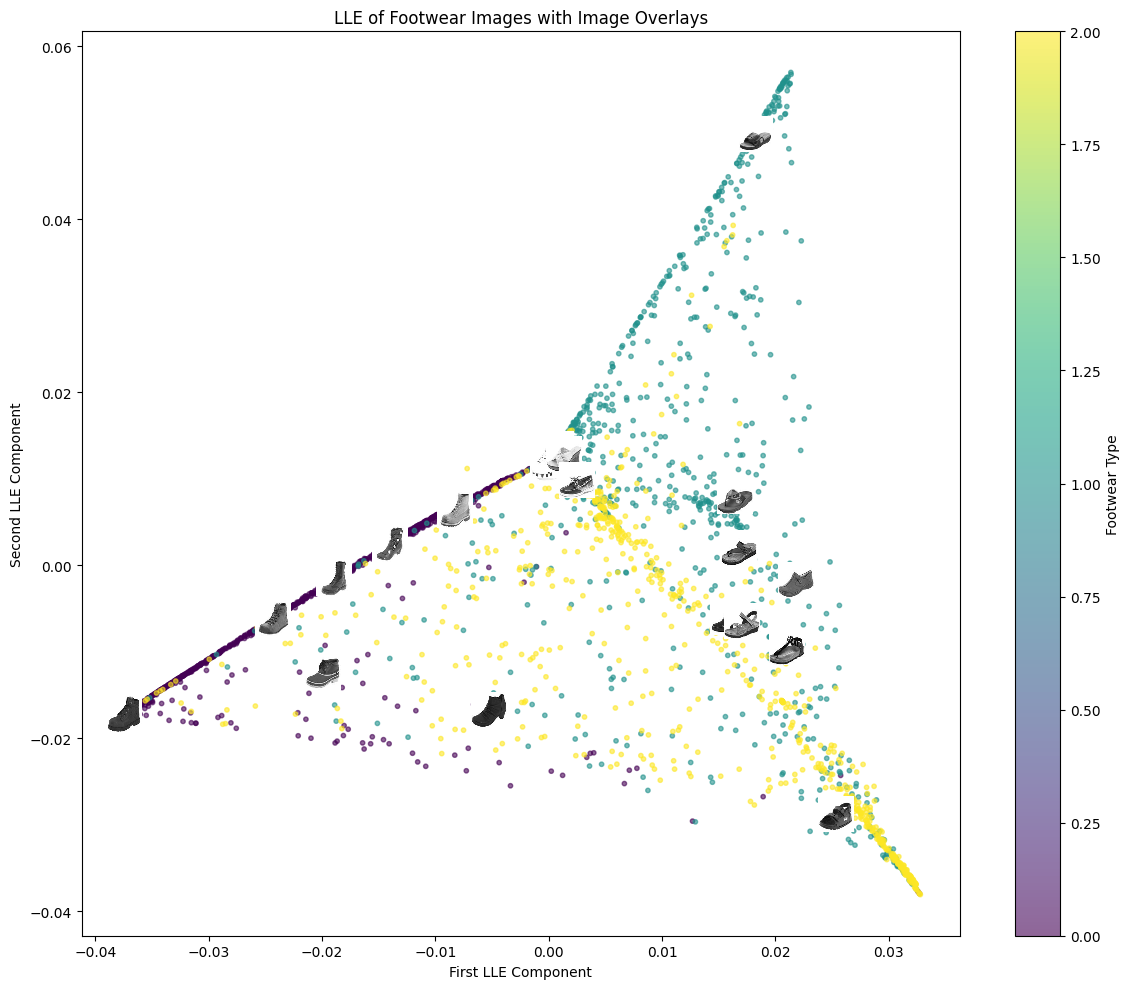

In [24]:
# Apply LLE

lle = LocallyLinearEmbedding(n_components=2, random_state=42)

X_lle = lle.fit_transform(X_scaled)



# Create a numeric encoding for the categories

category_encoding = {category: i for i, category in enumerate(np.unique(y))}

numeric_categories = np.array([category_encoding[cat] for cat in y])



# Create scatter plot

plt.figure(figsize=(12, 10), dpi=100)

scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=numeric_categories, cmap='viridis', alpha=0.6, s=10)

plt.colorbar(scatter, label='Footwear Type')

plt.title('LLE of Footwear Images with Image Overlays')

plt.xlabel('First LLE Component')

plt.ylabel('Second LLE Component')



# Add image overlays

def plot_images(X, X_lle, images, ax, img_size=128, max_images=20):

    indices = np.random.choice(len(X), min(max_images, len(X)), replace=False)

    for index in indices:

        x, y = X_lle[index]

        img = X[index].reshape(img_size, img_size)

        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]

        imagebox = OffsetImage(img, zoom=0.2, cmap='gray')

        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0.0)

        ax.add_artist(ab)



plot_images(X, X_lle, y, plt.gca(), img_size=128, max_images=20)

plt.tight_layout()

plt.show()

MDS

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


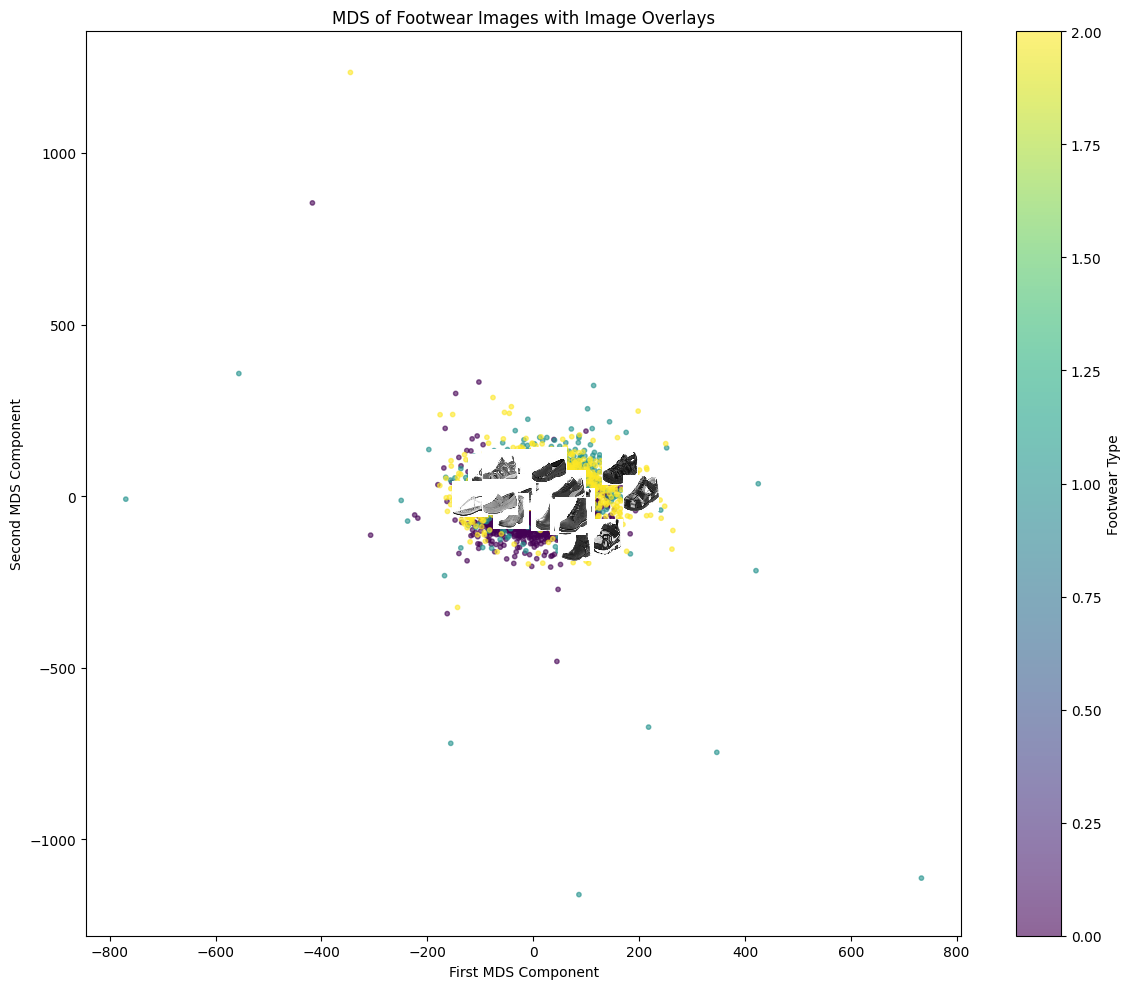

In [25]:
# Apply MDS

mds = MDS(n_components=2, n_jobs=-1, random_state=42)

X_mds = mds.fit_transform(X_scaled)



# Create a numeric encoding for the categories

category_encoding = {category: i for i, category in enumerate(np.unique(y))}

numeric_categories = np.array([category_encoding[cat] for cat in y])



# Create scatter plot

plt.figure(figsize=(12, 10), dpi=100)

scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=numeric_categories, cmap='viridis', alpha=0.6, s=10)

plt.colorbar(scatter, label='Footwear Type')

plt.title('MDS of Footwear Images with Image Overlays')

plt.xlabel('First MDS Component')

plt.ylabel('Second MDS Component')



# Add image overlays

def plot_images(X, X_mds, images, ax, img_size=128, max_images=20):

    indices = np.random.choice(len(X), min(max_images, len(X)), replace=False)

    for index in indices:

        x, y = X_mds[index]

        img = X[index].reshape(img_size, img_size)

        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]

        imagebox = OffsetImage(img, zoom=0.2, cmap='gray')

        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0.0)

        ax.add_artist(ab)



plot_images(X, X_mds, y, plt.gca(), img_size=128, max_images=20)

plt.tight_layout()

plt.show()



Discussion on the visualizations:



---



t-SNE Visualization



The t-SNE plot shows clear clustering of footwear types with distinct separation between classes. The visualization spreads the data points across the space effectively, creating three main clusters. The purple points (likely boots) form a concentrated cluster at the bottom, while the other footwear types are distributed in the upper regions with some overlap.



LLE Visualization



The LLE projection displays a more linear structure with a distinctive fan-like pattern. The data points are arranged in a triangular formation, with boots appearing to form a linear sequence along one edge. The visualization maintains local relationships well but shows less clear global separation between classes compared to t-SNE.



MDS Visualization



The MDS plot exhibits the most compact clustering among the three methods. The points are densely concentrated in the center with some outliers scattered at extreme distances. This suggests that MDS might be more sensitive to outliers in the dataset. The separation between footwear types is less distinct compared to both t-SNE and LLE.



---

Key Differences



t-SNE provides the best visual separation of clusters



LLE preserves local geometric relationships, resulting in a more structured pattern



MDS shows the highest degree of point concentration with notable outlier sensitivity



---

Effectiveness for Footwear Classification

t-SNE appears most effective for this dataset as it creates clear, interpretable clusters while maintaining both local and global structure. LLE's linear arrangement might be useful for understanding gradual transitions between footwear types, while MDS's visualization might be less practical for classification purposes due to its dense central clustering.



---


Q5

A

K-means is implemented correctly



Selection of the number of clusters using one of the techniques

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2: Silhouette Score=0.1322, Inertia=42229585.84


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3: Silhouette Score=0.1376, Inertia=38597531.02


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4: Silhouette Score=0.1341, Inertia=35517536.79


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5: Silhouette Score=0.1274, Inertia=33716381.20


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6: Silhouette Score=0.1278, Inertia=32192935.33


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7: Silhouette Score=0.1107, Inertia=31269936.90


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8: Silhouette Score=0.0989, Inertia=30622254.93


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9: Silhouette Score=0.1104, Inertia=29583361.98


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=10: Silhouette Score=0.1004, Inertia=29530246.30


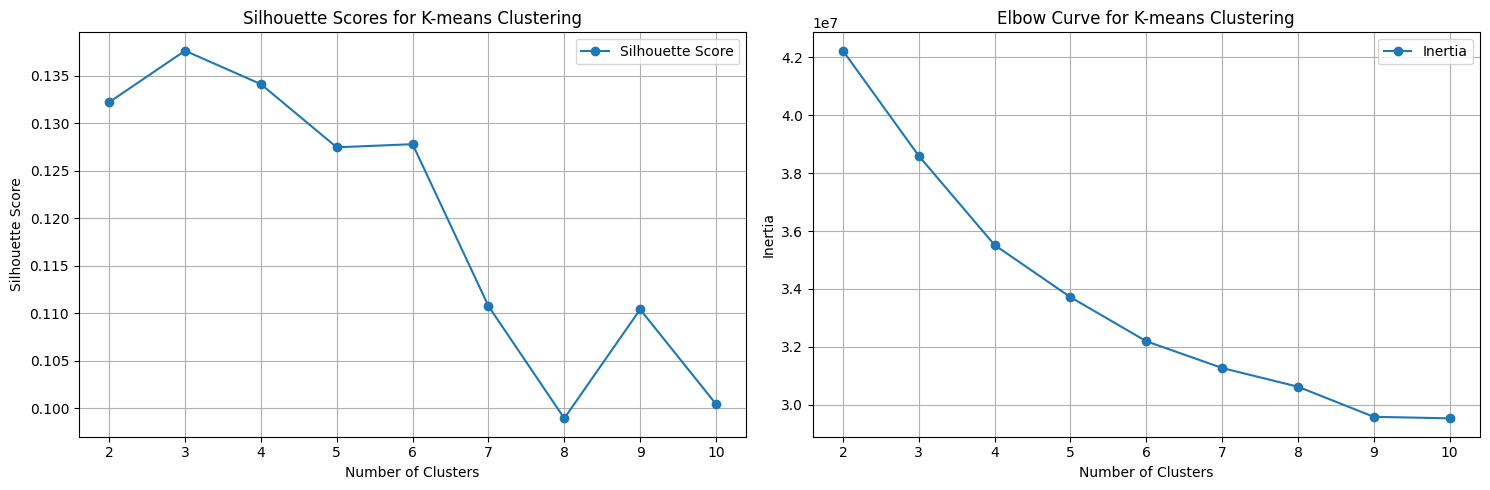


Optimal number of clusters (by Silhouette Score): 3


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
import numpy as np

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler



# Assuming X is your input data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



def find_optimal_clusters(X, max_k):

    silhouette_scores = []

    inertias = []

    K = range(2, max_k + 1)



    for k in K:

        # Initialize and fit KMeans

        kmeans = KMeans(n_clusters=k, random_state=42)

        labels = kmeans.fit_predict(X)



        # Calculate silhouette score and inertia

        score = silhouette_score(X, labels)

        inertia = kmeans.inertia_



        silhouette_scores.append(score)

        inertias.append(inertia)



        print(f'k={k}: Silhouette Score={score:.4f}, Inertia={inertia:.2f}')



    return K, silhouette_scores, inertias



# Find optimal number of clusters

max_clusters = 10

K, silhouette_scores, inertias = find_optimal_clusters(X_scaled, max_clusters)



# Create subplots for both metrics

plt.figure(figsize=(15, 5))



# Plot silhouette scores

plt.subplot(1, 2, 1)

plt.plot(list(K), silhouette_scores, marker='o', label='Silhouette Score')

plt.title('Silhouette Scores for K-means Clustering')

plt.xlabel('Number of Clusters')

plt.ylabel('Silhouette Score')

plt.xticks(list(K))

plt.grid(True)

plt.legend()



# Plot inertia (elbow curve)

plt.subplot(1, 2, 2)

plt.plot(list(K), inertias, marker='o', label='Inertia')

plt.title('Elbow Curve for K-means Clustering')

plt.xlabel('Number of Clusters')

plt.ylabel('Inertia')

plt.xticks(list(K))

plt.grid(True)

plt.legend()



plt.tight_layout()

plt.show()



# Find optimal k using silhouette score

optimal_k = list(K)[np.argmax(silhouette_scores)]

print(f'\nOptimal number of clusters (by Silhouette Score): {optimal_k}')



# Perform final clustering with optimal k

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)

cluster_labels = final_kmeans.fit_predict(X_scaled)


B

Accuracy computation

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


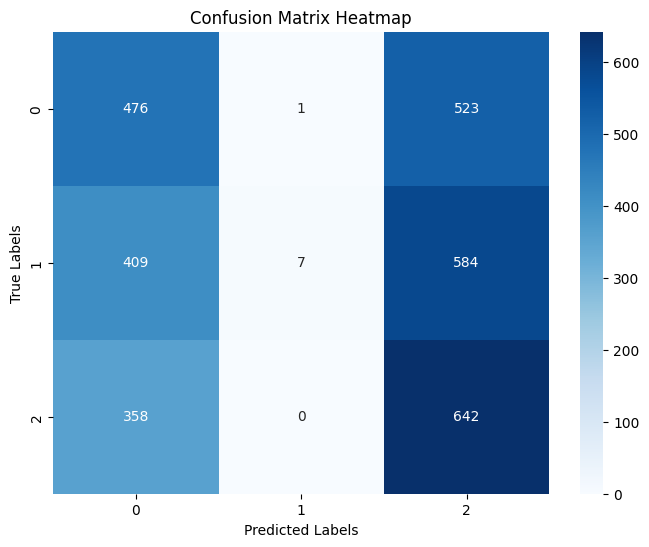


 Clustering Accuracy: 0.3750


In [27]:
import numpy as np

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns



# Assuming X is your standardized data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



# Initialize and fit KMeans with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42)

cluster_labels = kmeans.fit_predict(X_scaled)



# Convert string labels to numeric for comparison

le = LabelEncoder()

true_labels = le.fit_transform(y)



# Since KMeans cluster labels are arbitrary, we need to find the best mapping

def get_best_mapping(true_labels, cluster_labels):

    best_acc = 0

    best_mapping = None

    for perm in [[0,1,2], [0,2,1], [1,0,2], [1,2,0], [2,0,1], [2,1,0]]:

        mapped_labels = np.array([perm[label] for label in cluster_labels])

        acc = accuracy_score(true_labels, mapped_labels)

        if acc > best_acc:

            best_acc = acc

            best_mapping = perm

    return best_mapping, best_acc



# Get best mapping and accuracy

best_mapping, accuracy = get_best_mapping(true_labels, cluster_labels)

mapped_clusters = np.array([best_mapping[label] for label in cluster_labels])



# Calculate confusion matrix

cm = confusion_matrix(true_labels, mapped_clusters)



# Create heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.title('Confusion Matrix Heatmap')

plt.show()



# Print results

print(f'\n Clustering Accuracy: {accuracy:.4f}')

Q6

A



EM has been implemented.



Evaluation for the number of clusters.

Components: 1, Time taken: 0.44s
Components: 2, Time taken: 5.60s
Components: 3, Time taken: 8.78s
Components: 4, Time taken: 5.94s
Components: 5, Time taken: 5.30s
Components: 6, Time taken: 5.21s
Components: 7, Time taken: 4.86s
Components: 8, Time taken: 8.75s
Components: 9, Time taken: 7.48s
Components: 10, Time taken: 9.21s


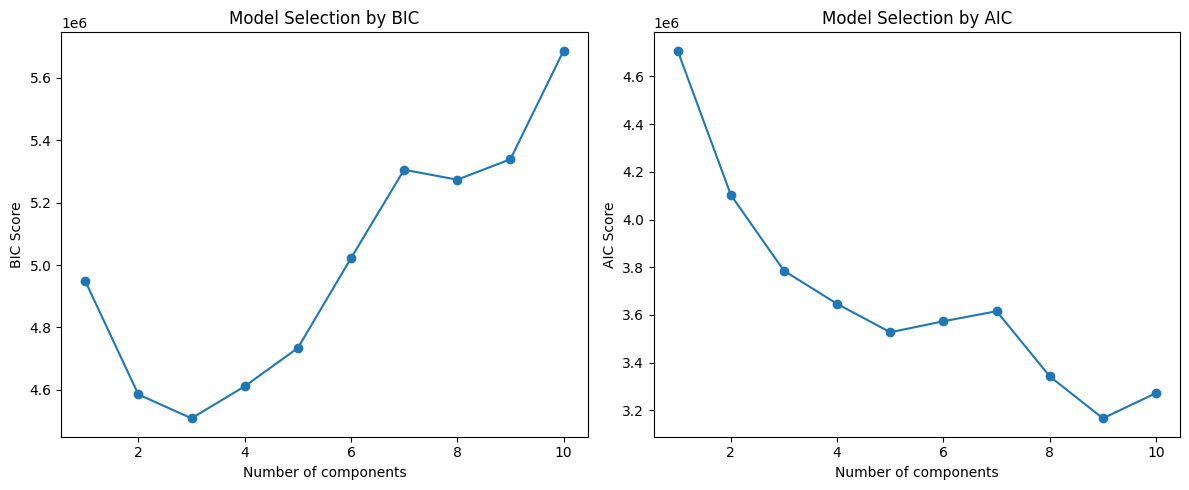

Optimal number of components (BIC): 3
Optimal number of components (AIC): 9


In [28]:
import numpy as np

from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import time

import signal



class TimeoutException(Exception):

    pass



def timeout_handler(signum, frame):

    raise TimeoutException("Computation took too long!")



# Assuming X is your input data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



# Apply PCA to reduce dimensions while preserving 90% of variance

pca = PCA(n_components=0.90)

X_reduced = pca.fit_transform(X_scaled)



# Try different numbers of components

n_components_range = range(1, 11)

bic_scores = []

aic_scores = []



# Set the timeout handler

signal.signal(signal.SIGALRM, timeout_handler)



try:

    for n_components in n_components_range:

        # Set 40s timeout

        signal.alarm(40)



        start_time = time.time()



        gmm = GaussianMixture(

            n_components=n_components,

            random_state=42,

            n_init=1,

            covariance_type='full',

            max_iter=100,

            tol=1e-3

        )



        try:

            gmm.fit(X_reduced)

            bic_scores.append(gmm.bic(X_reduced))

            aic_scores.append(gmm.aic(X_reduced))

            print(f'Components: {n_components}, Time taken: {time.time() - start_time:.2f}s')



        except TimeoutException:

            print(f"Timeout reached at {n_components} components")

            break



        finally:

            signal.alarm(0)  # Disable the alarm



except Exception as e:

    print(f"An error occurred: {str(e)}")



finally:

    # Plot results for completed iterations

    if len(bic_scores) > 0:

        plt.figure(figsize=(12, 5))



        plt.subplot(1, 2, 1)

        plt.plot(list(n_components_range)[:len(bic_scores)], bic_scores, 'o-')

        plt.xlabel('Number of components')

        plt.ylabel('BIC Score')

        plt.title('Model Selection by BIC')



        plt.subplot(1, 2, 2)

        plt.plot(list(n_components_range)[:len(aic_scores)], aic_scores, 'o-')

        plt.xlabel('Number of components')

        plt.ylabel('AIC Score')

        plt.title('Model Selection by AIC')



        plt.tight_layout()

        plt.show()



        if len(bic_scores) > 0:

            optimal_n_components_bic = n_components_range[np.argmin(bic_scores)]

            print(f'Optimal number of components (BIC): {optimal_n_components_bic}')



        if len(aic_scores) > 0:

            optimal_n_components_aic = n_components_range[np.argmin(aic_scores)]

            print(f'Optimal number of components (AIC): {optimal_n_components_aic}')



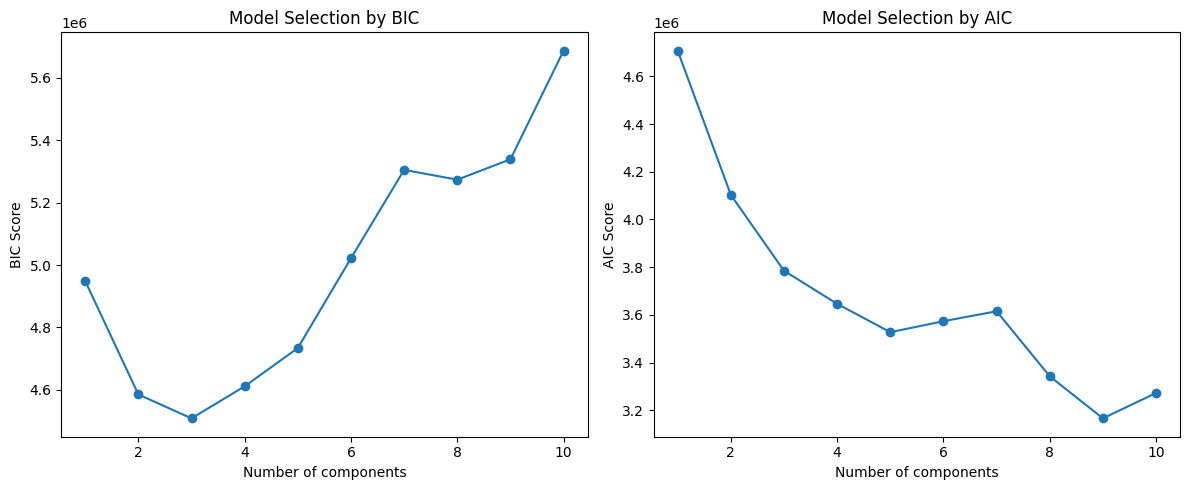

Optimal number of components (BIC): 3
Optimal number of components (AIC): 9


In [29]:
import numpy as np

from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt



# Assuming X is your input data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



# Apply PCA to reduce dimensions while preserving 90% of variance

pca = PCA(n_components=0.90)

X_reduced = pca.fit_transform(X_scaled)



# Try different numbers of components

n_components_range = range(1, 11)

bic_scores = []

aic_scores = []



for n_components in n_components_range:

    gmm = GaussianMixture(

        n_components=n_components,

        random_state=42,

        n_init=1,

        covariance_type='full',

        max_iter=50,

        tol=1e-4,

        warm_start=True

    )



    gmm.fit(X_reduced)

    bic_scores.append(gmm.bic(X_reduced))

    aic_scores.append(gmm.aic(X_reduced))



# Plot results

plt.figure(figsize=(12, 5))



plt.subplot(1, 2, 1)

plt.plot(list(n_components_range), bic_scores, 'o-')

plt.xlabel('Number of components')

plt.ylabel('BIC Score')

plt.title('Model Selection by BIC')



plt.subplot(1, 2, 2)

plt.plot(list(n_components_range), aic_scores, 'o-')

plt.xlabel('Number of components')

plt.ylabel('AIC Score')

plt.title('Model Selection by AIC')



plt.tight_layout()

plt.show()



optimal_n_components_bic = n_components_range[np.argmin(bic_scores)]

optimal_n_components_aic = n_components_range[np.argmin(aic_scores)]

print(f'Optimal number of components (BIC): {optimal_n_components_bic}')

print(f'Optimal number of components (AIC): {optimal_n_components_aic}')

B

Accuracy computation

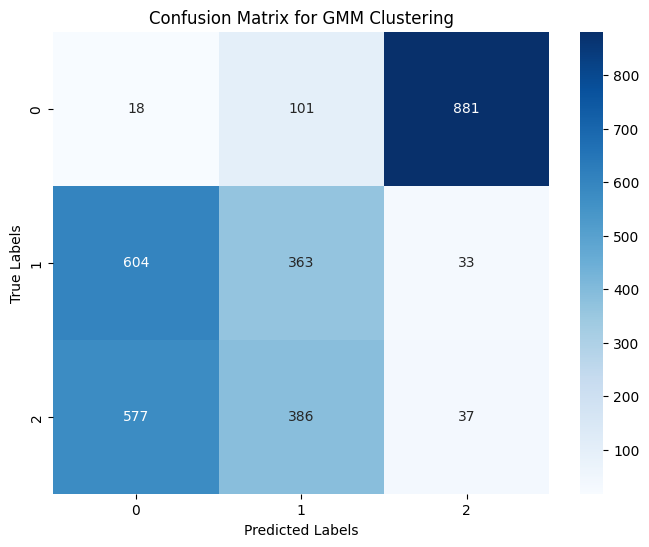


 Clustering Accuracy: 0.6237


In [30]:
import numpy as np

from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix

from scipy.optimize import linear_sum_assignment

import matplotlib.pyplot as plt

import seaborn as sns



# Standardize the data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



# Apply PCA to reduce dimensions while preserving 90% of variance

pca = PCA(n_components=0.90)

X_reduced = pca.fit_transform(X_scaled)



# Convert string labels to numeric using LabelEncoder

le = LabelEncoder()

y_encoded = le.fit_transform(y)



# Set number of clusters to 3

n_clusters = 3



# Initialize and fit GMM

gmm = GaussianMixture(

    n_components=n_clusters,

    random_state=42,

    n_init=3,

    covariance_type='full',

    max_iter=100,

    tol=1e-3

)



# Fit and predict clusters

cluster_labels = gmm.fit_predict(X_reduced)



# Calculate clustering accuracy

contingency_matrix = confusion_matrix(y_encoded, cluster_labels)



# Use Hungarian algorithm to find optimal label mapping

row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

accuracy = contingency_matrix[row_ind, col_ind].sum() / len(y_encoded)



# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(contingency_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.title('Confusion Matrix for GMM Clustering')

plt.show()



print(f'\n Clustering Accuracy: {accuracy:.4f}')


C

Generation of 20 images using sample method with visualization

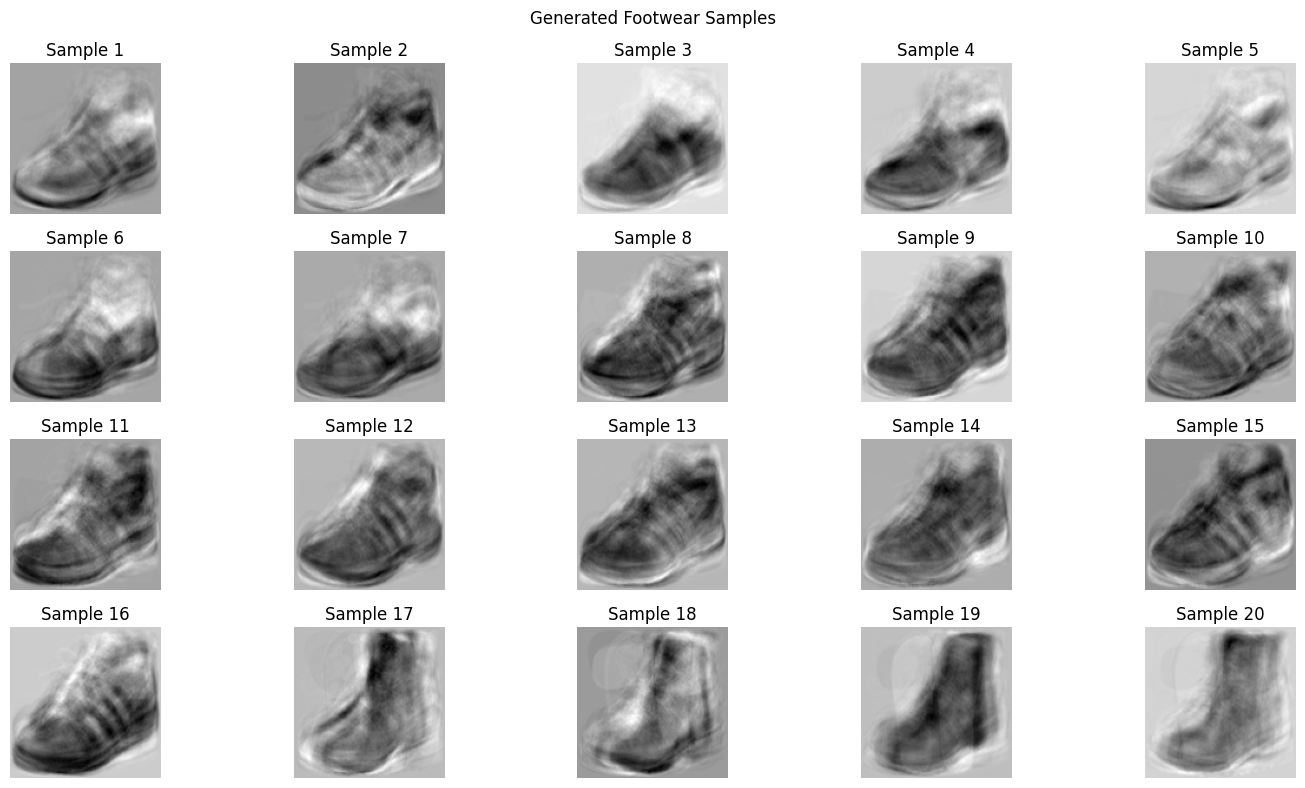

In [31]:
import numpy as np

from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt



# Generate 20 new samples from the trained GMM

n_samples = 20

new_samples = gmm.sample(n_samples)[0]



# Transform samples back to original space

new_samples_original = pca.inverse_transform(new_samples)

new_samples_original = scaler.inverse_transform(new_samples_original)



# Reshape samples back to image dimensions (assuming original images were square)

img_size = int(np.sqrt(new_samples_original.shape[1]))

new_images = new_samples_original.reshape(n_samples, img_size, img_size)



# Plot the generated images

plt.figure(figsize=(15, 8))

for i in range(n_samples):

    plt.subplot(4, 5, i+1)

    plt.imshow(new_images[i], cmap='gray')

    plt.axis('off')

    plt.title(f'Sample {i+1}')



plt.suptitle('Generated Footwear Samples')

plt.tight_layout()

plt.show()


Q7

A & B

Training Time Report



Sequential Model has been implemented correctly with right number of neurons



Validation Data has been incorporated



Accuracy is increasing with epochs



Plots of val and training loss via training epochs

In [33]:
import tensorflow as tf

from tensorflow.keras import layers, models

import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import time

import matplotlib.pyplot as plt

import os



# Set random seed for reproducibility

tf.random.set_seed(42)



# Image parameters

IMG_HEIGHT = 128

IMG_WIDTH = 128

CHANNELS = 1  # Grayscale images

BATCH_SIZE = 32



def load_and_preprocess_data(data_dir):

    images = []

    labels = []



    for category in ['Boot', 'Sandal', 'Shoe']:

        category_path = os.path.join(data_dir, category)

        if os.path.isdir(category_path):

            for img_name in os.listdir(category_path):

                img_path = os.path.join(category_path, img_name)

                if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):

                    img = tf.keras.utils.load_img(

                        img_path,

                        color_mode='grayscale',

                        target_size=(IMG_HEIGHT, IMG_WIDTH)

                    )

                    img_array = tf.keras.utils.img_to_array(img)

                    images.append(img_array)

                    labels.append(category)



    return np.array(images), np.array(labels)



# Load data

X, y = load_and_preprocess_data('/kaggle/input/footwear/Footwear')



# Split data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)



print("X_train shape:", X_train.shape)

print("y_train shape:", y_train.shape)

print("X_val shape:", X_val.shape)

print("y_val shape:", y_val.shape)



# Normalize pixel values

X_train = X_train / 255.0

X_val = X_val / 255.0



# Convert labels to numeric

le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_val = le.transform(y_val)



# Convert to categorical

y_train = tf.keras.utils.to_categorical(y_train)

y_val = tf.keras.utils.to_categorical(y_val)



# Build the model

model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),

    layers.Dense(8, activation='relu'),

    layers.Dense(3, activation='softmax')

])



# Compile the model

model.compile(

    optimizer='adam',

    loss='categorical_crossentropy',

    metrics=['accuracy']

)



# Train the model and measure time

start_time = time.time()



history = model.fit(

    X_train, y_train,

    epochs=8,

    batch_size=BATCH_SIZE,

    validation_data=(X_val, y_val),

    callbacks=[

        tf.keras.callbacks.EarlyStopping(

            monitor='val_loss',

            patience=5,

            restore_best_weights=True

        )

    ]

)



training_time = time.time() - start_time

print(f"\nTraining time: {training_time:.2f} seconds")


X_train shape: (2250, 128, 128, 1)
y_train shape: (2250,)
X_val shape: (750, 128, 128, 1)
y_val shape: (750,)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 496ms/step - accuracy: 0.4512 - loss: 1.0016 - val_accuracy: 0.7520 - val_loss: 0.5493
Epoch 2/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 34s 481ms/step - accuracy: 0.7395 - loss: 0.5282 - val_accuracy: 0.8387 - val_loss: 0.3649
Epoch 3/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 468ms/step - accuracy: 0.8425 - loss: 0.3471 - val_accuracy: 0.9200 - val_loss: 0.2191
Epoch 4/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 460ms/step - accuracy: 0.8879 - loss: 0.2577 - val_accuracy: 0.9360 - val_loss: 0.1833
Epoch 5/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 462ms/step - accuracy: 0.9298 - loss: 0.2075 - val_accuracy: 0.9507 - val_loss: 0.1419
Epoch 6/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 466ms/step - accuracy: 0.9465 - loss: 0.1545 - val_accuracy: 0.9520 - val_loss: 0.1438
Epoch 7/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 465ms/step - accuracy: 0.9587 - loss: 0.1186 - val_accuracy: 0.9573 - val_loss: 0.1302
Epoch 8/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 32s 458ms/step - accuracy: 0.9636 - loss: 0.1084 - val_accuracy: 0.

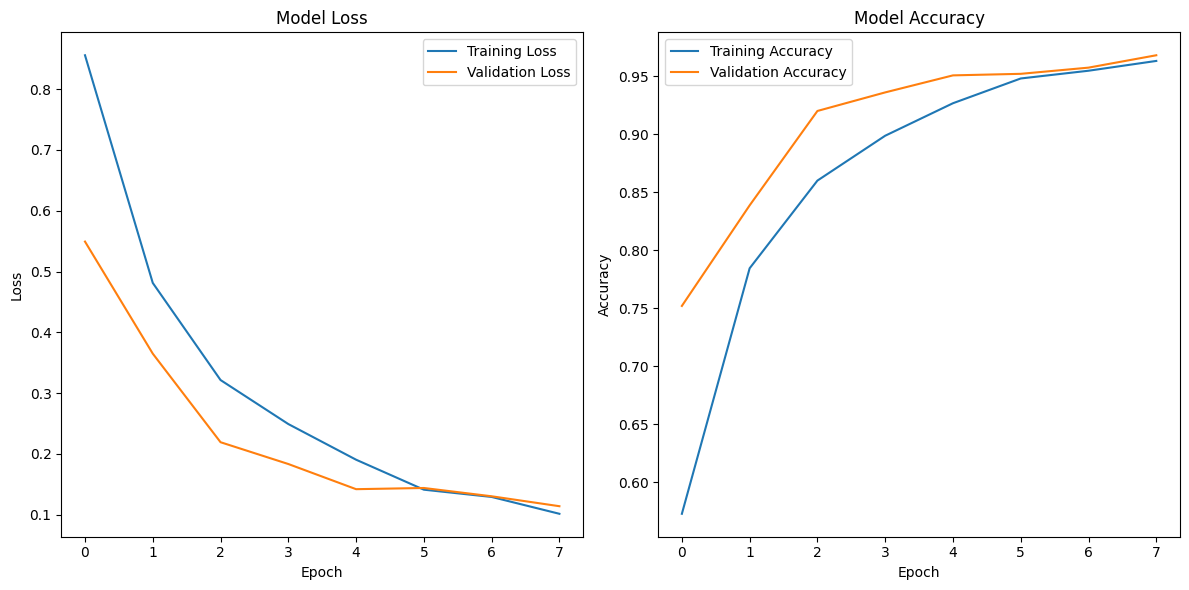

In [34]:


# Plot training history

plt.figure(figsize=(12, 6))



plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()



plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()



plt.tight_layout()

plt.show()


C

Parameters summary

In [35]:
import numpy as np



model.summary()



total_params = model.count_params()

total_bias_params = sum(np.prod(layer.bias.shape) if hasattr(layer, 'bias') and layer.bias is not None else 0 for layer in model.layers)



print(f"\nTotal parameters: {total_params}")

print(f"Total bias parameters: {total_bias_params}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,010,923 (19.12 MB)

 Trainable params: 1,670,307 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340,616 (12.74 MB)


Total parameters: 1670307
Total bias parameters: 363
